In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def reward_rules(position, action, terminal, states):
    if position in terminal:
        return position, 0
    new_position = np.array(position) + np.array(action)
    n_p = new_position.tolist()
    if n_p not in states:
        return position, 0
    else:
        return new_position, -1

def policy_evaluation(ValueFunction, states, actions, gamma, theta):
    while True:
        v = np.copy(ValueFunction)
        delta = []
        for s in states:
            update = 0
            for a in actions:
                new_position, r = reward_rules(s, a, terminal, states)
                update += (1/len(actions))*(r+(gamma*ValueFunction[new_position[0], new_position[1]]))
            delta.append(np.abs(v[s[0], s[1]]- update))
            v[s[0], s[1]] = update
        ValueFunction = v
        if np.all(delta < theta):
            return ValueFunction

In [3]:
gamma = 1
gridSize = 4
terminal = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]
theta = np.repeat(0.001, 16)
V = np.zeros((gridSize, gridSize))

nV = policy_evaluation(V, states, actions, gamma, theta)
nV

array([[  0.        , -10.98977041, -15.48484159, -16.48303684],
       [-10.98977041, -14.48664634, -15.98494299, -15.48484159],
       [-15.48484159, -15.98494299, -14.48664634, -10.98977041],
       [-16.48303684, -15.48484159, -10.98977041,   0.        ]])

In [4]:
def random_policy(states, actions):
    policy = {} 
    for s in states:
        rand_action = np.random.choice(len(actions))
        policy['{}'.format(s)] = actions[rand_action]
    return policy

In [14]:
def policy_improvement(states, policy, actions, terminal, ValueFunction):
    stable = np.repeat(True, len(states))
    i = 0
    for s in states:
        old_action = policy['{}'.format(s)]
        max_a = actions[0]
        max_pos, max_r = reward_rules(s, max_a, terminal, states)
        max_action = (max_r+(gamma*ValueFunction[max_pos[0], max_pos[1]]))
        for a in actions:
            new_position, r = reward_rules(s, a, terminal, states)           
            value_action = (r+(gamma*ValueFunction[new_position[0], new_position[1]]))
            if np.all(max_action < value_action):
                max_a = a
        policy['{}'.format(s)] = max_a
        if np.any(old_action != policy['{}'.format(s)]):
            stable[i] = False
        i += 1
    return policy, stable 

In [6]:
def policy_iteration(gridSize, states, actions, gamma, theta, terminal):
    V = np.zeros((gridSize, gridSize))
    policy = random_policy(states, actions)
    while True:    
        V = policy_evaluation(V, states, actions, gamma, theta)
        p , stable= policy_improvement(states, policy, actions, terminal, V)
        if np.all(stable):
            break
        else: policy = p
    return p

In [15]:
prova = policy_iteration(gridSize, states, actions, gamma, theta, terminal)
prova

{'[0, 0]': [-1, 0],
 '[0, 1]': [0, -1],
 '[0, 2]': [0, -1],
 '[0, 3]': [-1, 0],
 '[1, 0]': [-1, 0],
 '[1, 1]': [-1, 0],
 '[1, 2]': [0, -1],
 '[1, 3]': [0, -1],
 '[2, 0]': [-1, 0],
 '[2, 1]': [-1, 0],
 '[2, 2]': [0, 1],
 '[2, 3]': [0, -1],
 '[3, 0]': [0, -1],
 '[3, 1]': [0, 1],
 '[3, 2]': [0, 1],
 '[3, 3]': [-1, 0]}

Policy iteration is wrong

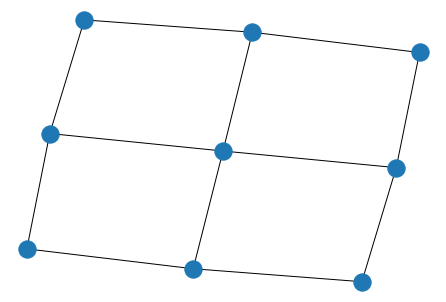

In [9]:
g = nx.Graph()
g.add_nodes_from([0,1,2,3,4,5,6,7,8])
g.add_edges_from([(0,1), (1,2), (0,3), (3,4), (1,4), (4,5), (2,5), (3,6), (6,7), (4,7), (7,8), (5,8)])
nx.draw(g)
plt.show()

In [37]:
prova = [True, True, True]
if np.all(prova):
    print("error")

error
